# Test if power consumption is uniform


The start and end time is running one hour back


In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import os

import json
import pandas as pd

from sqlalchemy.types import TIMESTAMP as typeTIMESTAMP

from dotenv import load_dotenv

load_dotenv(verbose=True)

import math
import logging
logger = logging.getLogger(__name__)

import dateutil

In [2]:
from sqlalchemy import create_engine
REMOTE_HOST=os.getenv('REMOTE_HOST')
REMOTE_DB_PASS=os.getenv('REMOTE_DB_PASS')
REMOTE_USER=os.getenv('REMOTE_USER')
DB_NAME=os.getenv('DB_NAME')

engine = create_engine(f'postgresql+psycopg2://{REMOTE_USER}:{REMOTE_DB_PASS}@{REMOTE_HOST}/{DB_NAME}', server_side_cursors=True)

In [4]:
# table_name='events'

# last_hours = 2
# df = pd.read_sql_query(f"""
# SELECT
#        to_timestamp(event_data::json -> 'new_state' ->> 'last_changed','YYYY-MM-DD"T"HH24:MI:SS.US') as last_changed,
#        event_data::json -> 'new_state' -> 'entity_id' as entity_id,
#        event_data::json -> 'new_state' -> 'attributes' -> 'node_id' as node_id,
#        event_data::json -> 'new_state' -> 'attributes' -> 'power_consumption' as power_consumption,
#        event_data::json -> 'new_state' -> 'attributes' -> 'unit_of_measurement' as unit
# FROM  events
# WHERE event_type like 'state_changed'
# AND event_data::json ->> 'entity_id' = 'sensor.aeon_labs_zw096_smart_switch_6_power_2'
# -- ORDER BY last_changed DESC limit 3600 * {last_hours}
# ;
# """, con=engine)

In [23]:
# df['last_changed'] = pd.to_datetime(df['last_changed'], errors='coerce')
# df.dropna(subset=['last_changed'], inplace=True)
# df.set_index('last_changed', inplace=True)

In [25]:
# df.tail()

,entity_id,node_id,power_consumption,unit
last_changed,,,,
2020-05-30 14:32:33.790128+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.784,W
2020-05-30 14:32:36.793057+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.675,W
2020-05-30 14:32:39.782380+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.729,W
2020-05-30 14:32:42.790067+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.778,W
2020-05-30 14:32:45.788001+00:00,sensor.aeon_labs_zw096_smart_switch_6_power_2,5.0,16.794,W


In [11]:
#df.to_csv("../results/power_sst_2_40_128.csv")

In [5]:
df = pd.read_csv("../results/power_sst_2_40_128.csv")

In [6]:
df['last_changed'] = pd.to_datetime(df['last_changed'], errors='coerce')
df.dropna(subset=['last_changed'], inplace=True)
df.set_index('last_changed', inplace=True)

In [7]:
start_date = '2020-06-17'
end_date = '2020-06-17'
start_time = '18:20'
end_time = '19:50'
subset_df4 = df.loc[start_date:end_date].between_time(start_time, end_time)[['power_consumption']]
subset_df4

,power_consumption
last_changed,
2020-06-17 18:20:00.163735+00:00,84.443
2020-06-17 18:20:03.165072+00:00,82.925
2020-06-17 18:20:06.158527+00:00,85.676
2020-06-17 18:20:09.159357+00:00,83.175
2020-06-17 18:20:12.158819+00:00,85.010
...,...
2020-06-17 19:06:48.202073+00:00,89.905
2020-06-17 19:06:51.200411+00:00,91.094
2020-06-17 19:06:54.198960+00:00,89.771


In [11]:
def plot_power(start_date,end_date,start_time,end_time):
    subset_df4 = df.loc[start_date:end_date].between_time(start_time, end_time)[['power_consumption']]
    y_max = subset_df4['power_consumption'].max() * 1.2

    subset_df4[(df != 0).all(1)].plot(ylim=(0,y_max))
    return subset_df4

/Users/shivangi/Documents/power_monitor/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


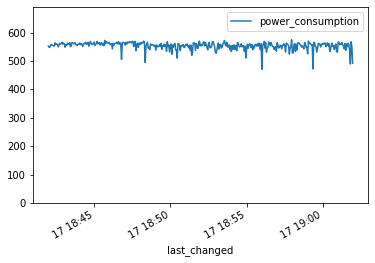

In [15]:
#time ran : 2020-06-17 19:41:02.838  2020-06-17 20:02:13.035 
subset_df = plot_power('2020-06-17','2020-06-17','18:42','19:02')

#an hour behind! 

In [16]:
from statsmodels.tsa.stattools import adfuller
def testStationary(series):
    X = series.values
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [17]:
testStationary(subset_df["power_consumption"])

ADF Statistic: -17.783019
p-value: 0.000000
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


## test

In [3]:
df = pd.read_csv("../results/bert-tiny-8-pm.csv")

In [4]:
df['last_changed'] = pd.to_datetime(df['last_changed'], errors='coerce')
df.dropna(subset=['last_changed'], inplace=True)
df.set_index('last_changed', inplace=True)

/Users/shivangi/Documents/power_monitor/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


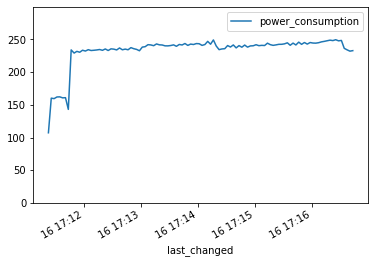

In [12]:
subset_df = plot_power('2020-07-16','2020-07-16','17:11:22','17:16:45')
#subset_df4 = df.loc['2020-07-16':'2020-07-16'].between_time('17:11:22','17:16:45')[['power_consumption']]
#subset_df4

/Users/shivangi/Documents/power_monitor/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


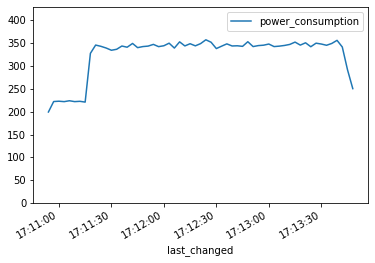

In [14]:
subset_df = plot_power('2020-07-15','2020-07-15','17:10:54','17:13:51')